In [4]:
import streamlit

streamlit.title('Hello')

DeltaGenerator()

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

gdp = pd.read_csv('https://raw.githubusercontent.com/AshishJangra27/Data-Analysis-with-Python-GFG/main/27.%20GDP%20Analysis%20-%20Assignment/gdp.csv')

In [2]:
gdp.head()

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10


In [3]:
gdp.nunique()

Country Name      256
Country Code      256
Year               57
Value           11398
dtype: int64

In [4]:
gdp.isnull().sum()

Country Name    0
Country Code    0
Year            0
Value           0
dtype: int64

In [50]:
x = gdp[gdp['Country Name'] == 'India']
x.iloc[0, :], x.iloc[len(x)-1, :]

(Country Name                 India
 Country Code                   IND
 Year                          1960
 Value           36535925029.925003
 Name: 6074, dtype: object,
 Country Name                   India
 Country Code                     IND
 Year                            2016
 Value           2263792499341.009766
 Name: 6130, dtype: object)

In [51]:
x.head()

,Country Name,Country Code,Year,Value
6074,India,IND,1960,3.653593e+10
6075,India,IND,1961,3.870910e+10
6076,India,IND,1962,4.159907e+10
6077,India,IND,1963,4.777600e+10
6078,India,IND,1964,5.572687e+10


<Axes: xlabel='Year', ylabel='Value'>

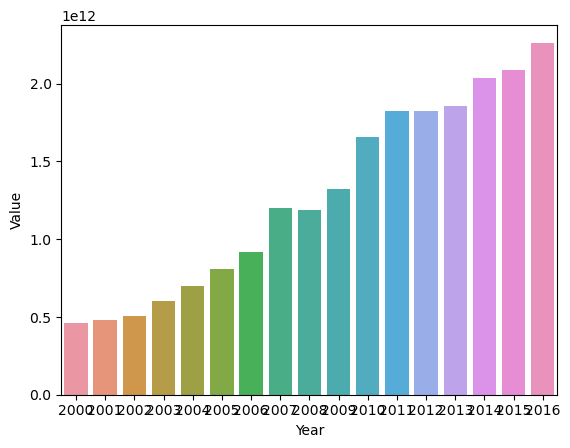

In [52]:
import seaborn as sns
sns.barplot(data = x.iloc[40:,:], x = 'Year', y = 'Value')

In [53]:
x.tail()

,Country Name,Country Code,Year,Value
6126,India,IND,2012,1.827638e+12
6127,India,IND,2013,1.856722e+12
6128,India,IND,2014,2.035393e+12
6129,India,IND,2015,2.089865e+12
6130,India,IND,2016,2.263792e+12


In [54]:
gdp_1 = x['Value'].iloc[0]
gdp_1

36535925029.925

In [55]:
x['Percentage Change'] = x['Value'].apply(lambda b : (b - gdp_1)*100/gdp_1)

C:\Users\nixty\AppData\Local\Temp\ipykernel_12916\1736598646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Percentage Change'] = x['Value'].apply(lambda b : (b - gdp_1)*100/gdp_1)


In [56]:
x.head()

,Country Name,Country Code,Year,Value,Percentage Change
6074,India,IND,1960,3.653593e+10,0.000000
6075,India,IND,1961,3.870910e+10,5.948039
6076,India,IND,1962,4.159907e+10,13.857991
6077,India,IND,1963,4.777600e+10,30.764449
6078,India,IND,1964,5.572687e+10,52.526241


In [57]:
x.tail()

,Country Name,Country Code,Year,Value,Percentage Change
6126,India,IND,2012,1.827638e+12,4902.303507
6127,India,IND,2013,1.856722e+12,4981.908067
6128,India,IND,2014,2.035393e+12,5470.937258
6129,India,IND,2015,2.089865e+12,5620.028737
6130,India,IND,2016,2.263792e+12,6096.072763


In [79]:
x = gdp.groupby('Country Name')
list_of_countries = np.array(x.first().index)
df = pd.DataFrame([])

for i in list_of_countries:
    x = gdp[gdp['Country Name'] == i]
    gdp_1 = x['Value'].iloc[0]
    x['Percentage Change'] = x['Value'].apply(lambda b : (b - gdp_1)*100/gdp_1)
    df = pd.concat([df,x])


C:\Users\nixty\AppData\Local\Temp\ipykernel_12916\3318416342.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Percentage Change'] = x['Value'].apply(lambda b : (b - gdp_1)*100/gdp_1)
C:\Users\nixty\AppData\Local\Temp\ipykernel_12916\3318416342.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Percentage Change'] = x['Value'].apply(lambda b : (b - gdp_1)*100/gdp_1)
C:\Users\nixty\AppData\Local\Temp\ipykernel_12916\3318416342.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [88]:
grouped = df.groupby('Country Name')['Percentage Change'].max()

In [110]:
grouped.sort_values(ascending = False, inplace = True)

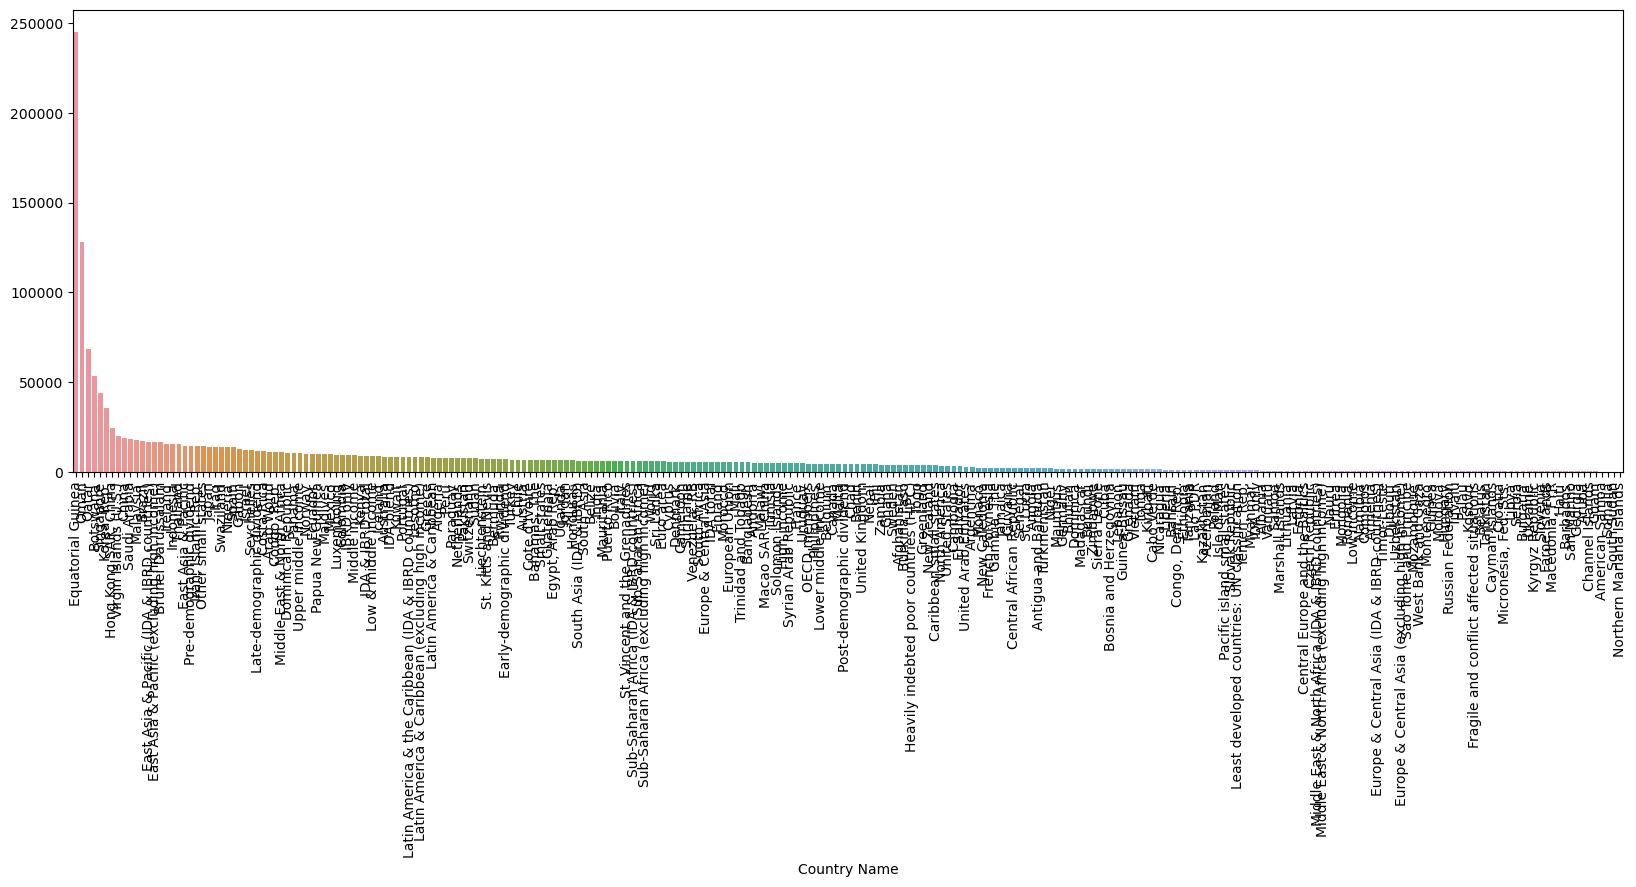

In [115]:
plt.figure(figsize = (20, 6))
sns.barplot(x = grouped.index, y = grouped.values)
plt.xticks(rotation = 90)
plt.show()


In [116]:
Gdp_max = df.groupby('Country Name')['Value'].max()

In [129]:
Gdp_max.head(30)

Country Name
World                                                   7.904923e+13
High income                                             5.036240e+13
OECD members                                            4.937008e+13
Post-demographic dividend                               4.673504e+13
IDA & IBRD total                                        2.948247e+13
Low & middle income                                     2.870476e+13
Middle income                                           2.829277e+13
IBRD only                                               2.739661e+13
Europe & Central Asia                                   2.365470e+13
East Asia & Pacific                                     2.248043e+13
Upper middle income                                     2.221220e+13
North America                                           2.016030e+13
Late-demographic dividend                               1.970310e+13
European Union                                          1.913667e+13
United States        

In [ ]:
Gdp_m

In [119]:
Gdp_max.sort_values(ascending = False, inplace = True)

In [131]:
dt = Gdp_max.iloc[:10]
dt.index

Index(['World', 'High income', 'OECD members', 'Post-demographic dividend',
       'IDA & IBRD total', 'Low & middle income', 'Middle income', 'IBRD only',
       'Europe & Central Asia', 'East Asia & Pacific'],
      dtype='object', name='Country Name')

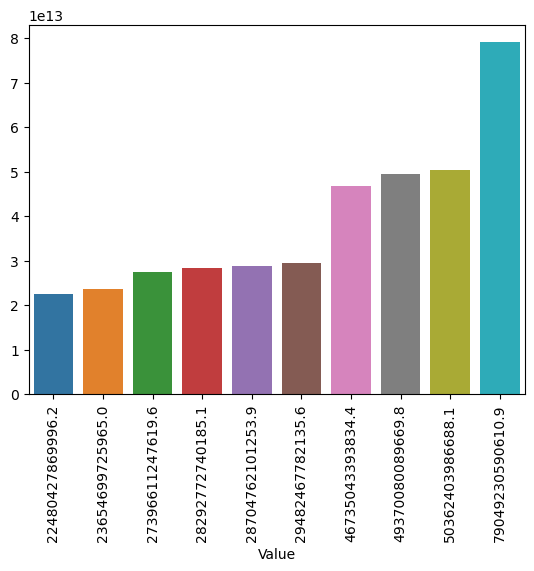

In [132]:
sns.barplot(data = dt, x = dt.index, y = dt.values)
plt.xticks(rotation = 90)
plt.show()